# Machine Learning (COSC 522)
## Project 1

## Mount Google Drive Folder (For Google Collab)

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [2]:
# Clone the repository if you're in Google Collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=False)
def mount_and_change_dir(is_collab: bool = False):
    from google.colab import drive
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=False)
    # Set working directory
    project_path = '/content/drive/MyDrive/Projects/UTK/COSC522'
    os.chdir(project_path)
    print(os.listdir(project_path))
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(mount_and_change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

## Initializations

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_formats = ['png']

import numpy as np
import matplotlib.pyplot as plt
from time import time
from pprint import pprint
import seaborn as sns
from scipy.stats import uniform, gaussian_kde, norm
from typing import *
from tqdm.notebook import tqdm

from custom_libs import ColorizedLogger

sns.set_style('darkgrid')

logger = ColorizedLogger('Project3', 'yellow')

### Load the two datasets and Preprocessing

In [4]:
# Located in <project root>/custom_libs/Project1
import custom_libs.Project3.data_loader as dl

In [5]:
# Create a Data Loader
datasets = ['pima', 'flowers']
data_loader = dl.DataLoader(datasets=datasets, data_folder='data')

In [6]:
# Print Statistics
data_loader.print_statistics()

2021-10-15 13:51:44 Data Loader  INFO     -- pima_tr --
2021-10-15 13:51:44 Data Loader  INFO     	Shape: (200, 8)
2021-10-15 13:51:44 Data Loader  INFO     	Type: float64
2021-10-15 13:51:44 Data Loader  INFO     	Mean:
2021-10-15 13:51:44 Data Loader  INFO     		[  3.57  123.97   71.26   29.215] (..)
2021-10-15 13:51:44 Data Loader  INFO     	Max:
2021-10-15 13:51:44 Data Loader  INFO     		[ 14. 199. 110.  99.] (..)
2021-10-15 13:51:44 Data Loader  INFO     	Min:
2021-10-15 13:51:44 Data Loader  INFO     		[ 0. 56. 38.  7.] (..)
2021-10-15 13:51:44 Data Loader  INFO     	Head:
2021-10-15 13:51:44 Data Loader  INFO     		[ 5. 86. 68. 28.] (..)
2021-10-15 13:51:44 Data Loader  INFO     -- pima_te --
2021-10-15 13:51:44 Data Loader  INFO     	Shape: (332, 8)
2021-10-15 13:51:44 Data Loader  INFO     	Type: float64
2021-10-15 13:51:44 Data Loader  INFO     	Mean:
2021-10-15 13:51:44 Data Loader  INFO     		[  3.48493976 119.25903614  71.65361446  29.1626506 ] (..)
2021-10-15 13:51:44 Da

In [7]:
# Standarize Pima dataset
data_loader.standarize_pima(print_statistics=True)

2021-10-15 13:51:48 Data Loader  INFO     -- pima_tr --
2021-10-15 13:51:48 Data Loader  INFO     	Shape: (200, 8)
2021-10-15 13:51:48 Data Loader  INFO     	Type: float64
2021-10-15 13:51:48 Data Loader  INFO     	Mean:
2021-10-15 13:51:48 Data Loader  INFO     		[ 4.10782519e-17  5.66213743e-17 -4.06896739e-16  1.36002321e-17] (..)
2021-10-15 13:51:48 Data Loader  INFO     	Max:
2021-10-15 13:51:48 Data Loader  INFO     		[3.10616203 2.37527224 3.38314936 5.96695452] (..)
2021-10-15 13:51:48 Data Loader  INFO     	Min:
2021-10-15 13:51:48 Data Loader  INFO     		[-1.06318298 -2.15176934 -2.90458306 -1.89948979] (..)
2021-10-15 13:51:48 Data Loader  INFO     	Head:
2021-10-15 13:51:48 Data Loader  INFO     		[ 0.42586881 -1.20204034 -0.28469455 -0.10388837] (..)
2021-10-15 13:51:48 Data Loader  INFO     -- pima_te --
2021-10-15 13:51:48 Data Loader  INFO     	Shape: (332, 8)
2021-10-15 13:51:48 Data Loader  INFO     	Type: float64
2021-10-15 13:51:48 Data Loader  INFO     	Mean:
2021-

In [8]:
# Get the two datasets
datasets = data_loader.get_datasets()
pima_tr, pima_te = datasets['pima']
flowers = datasets['flowers']

## Task 1

In [9]:
# Located in <project root>/custom_libs/Project2
import custom_libs.Project3.models as models
# The standarized dataset
nX_train = pima_tr
nX = pima_te

### FLD Algorithm

In [10]:
# Run FLD on the Pima dataset
fld = models.FLD()
fld.fit(nX_train)
# Get the c-1=1 projection
fX = fld.transform(nX)
fX_train = fld.transform(nX_train)
logger.info(f"nX shape including labels: {nX.shape}")
logger.info(f"fX shape including labels: {fX.shape}")

2021-10-15 13:51:51 Project3     INFO     nX shape including labels: (332, 8)
2021-10-15 13:51:51 Project3     INFO     fX shape including labels: (332, 2)


### PCA Algorithm

In [11]:
# Run PCA on the Pima dataset
pca = models.PCA()
# Run pca and keep 1 dimension
pca.fit(nX_train, max_dims=1)
pX1 = pca.transform(nX)
pX1_train = pca.transform(nX_train)
logger.info(f"nX shape including labels: {nX.shape}")
logger.info(f"pX1 shape including labels: {pX1.shape}")
# Run PCA and tolerate 15% error
pca.fit(nX_train, max_dims=1, max_error=0.15)
pX = pca.transform(nX)
pX_train = pca.transform(nX_train)
logger.info(f"pX (max 15% error) shape including labels: {pX.shape}")

2021-10-15 13:51:52 Project3     INFO     nX shape including labels: (332, 8)
2021-10-15 13:51:52 Project3     INFO     pX1 shape including labels: (332, 2)
2021-10-15 13:51:52 Project3 Models INFO     For # dims=5 error=0.09890249052449862 <= 0.15
2021-10-15 13:51:52 Project3     INFO     pX (max 15% error) shape including labels: (332, 6)


## Plot the Histograms of fX and pX1

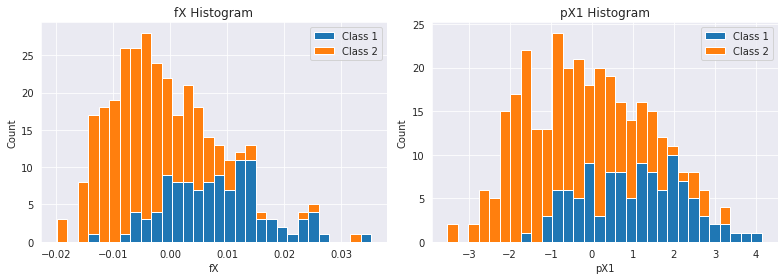

In [12]:
import custom_libs.Project3.plotter as pl
plotter = pl.Plotter(nx=nX, fx=fX, px1=pX1, px=pX)
plotter.plot_fx_px1_histograms(bins=30)

## Decide what distribution fits the two datasets

In [13]:
from fitter import Fitter
from scipy import stats
distributions = ['gamma', 'lognorm', 'norm', 'rayleigh', 'beta', 'invgauss', 'skewnorm']

### Test fX

2021-10-15 13:51:55 Project3     INFO     Running D’Agostino and Pearson’s test:
2021-10-15 13:51:55 Project3     INFO     p = 9.164306900152856e-06 < 0.001 ?
2021-10-15 13:51:55 Project3     INFO     Yes. The null hypothesis can be rejected. It can not be Gaussian.




          sumsquare_error        aic         bic  kl_div
beta           289.307733 -85.268296  -22.477277     inf
gamma          307.626065 -87.571736   -7.899594     inf
invgauss       326.970159 -87.545826   12.347073     inf
skewnorm       328.680194 -87.568931   14.078889     inf
lognorm        338.471737 -87.432637   23.824872     inf
rayleigh       406.409427        inf   78.749343     inf
norm           705.625746 -80.931937  261.921677     inf


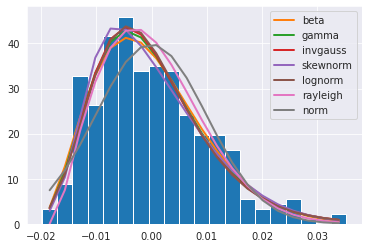

In [14]:
bins = 20
fx_fitter = Fitter(fX[:, :-1], distributions=distributions, bins=bins, 
                       density=False, timeout=60)
fx_fitter.fit()
print(fx_fitter.summary(10, clf=True))
# Run D’Agostino and Pearson’s test 
alpha = 1e-3
k2, p = stats.normaltest(fX[:, :-1])
logger.info("Running D’Agostino and Pearson’s test:")
logger.info(f"p = {p[0]} < {alpha} ?")
if p < alpha:  # null hypothesis: x comes from a normal distribution
    logger.info("Yes. The null hypothesis can be rejected. It can not be Gaussian.")
else:
    logger.info("No. The null hypothesis cannot be rejected. It can be Gaussian.")
logger.nl(2)

In [15]:
# bins = 20
# fx_fitter = Fitter(pX1[:, :-1], distributions=distributions, bins=bins, 
#                    density=False, timeout=60)
# fx_fitter.fit()
# fx_fitter.summary(10, clf=True)
# print(fx_fitter.summary(10, clf=True))
# Run D’Agostino and Pearson’s test 
alpha = 1e-3
k2, p = stats.normaltest(pX1[:, :-1])
logger.info("Running D’Agostino and Pearson’s test:")
logger.info(f"p = {p[0]} < {alpha} ?")
if p < alpha:  # null hypothesis: x comes from a normal distribution
    logger.info("Yes. The null hypothesis can be rejected. It can not be Gaussian.")
else:
    logger.info("No. The null hypothesis cannot be rejected. It can be Gaussian.")
logger.nl(2)

2021-10-15 13:51:56 Project3     INFO     Running D’Agostino and Pearson’s test:
2021-10-15 13:51:56 Project3     INFO     p = 0.0012767349740035417 < 0.001 ?
2021-10-15 13:51:56 Project3     INFO     No. The null hypothesis cannot be rejected. It can be Gaussian.




## Apply Case 3 and kNN on nX, fX, px1, and pX

In [29]:
import custom_libs.Project2.models as proj2_models
statistics = {'knn': {}, 'case3': {}}

### Apply kNN

In [30]:
k = 12

In [39]:
# kNN for nX
knn = proj2_models.KNN(k=k, train=nX_train)
knn.predict(nX)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix(case)
statistics['knn']['nX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='nX')

2021-10-15 14:04:46 Project2 Models INFO     kNN (k=12) for the nX dataset
2021-10-15 14:04:46 Project2 Models INFO     The overall accuracy is: 0.7801
2021-10-15 14:04:46 Project2 Models INFO     The classwise accuracies are: [0.5779816513761468, 0.8789237668161435]
2021-10-15 14:04:46 Project2 Models INFO     Total time: 0.0105 sec(s)
2021-10-15 14:04:46 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 14:04:46 Project2 Models INFO     |   Positive    |      63       |      27       |
2021-10-15 14:04:46 Project2 Models INFO     |   Negative    |      46       |      27       |


In [40]:
# kNN for fX
knn = proj2_models.KNN(k=k, train=fX_train)
knn.predict(fX)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix(case)
statistics['knn']['fX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='fX')

2021-10-15 14:05:29 Project2 Models INFO     kNN (k=12) for the fX dataset
2021-10-15 14:05:29 Project2 Models INFO     The overall accuracy is: 0.7801
2021-10-15 14:05:29 Project2 Models INFO     The classwise accuracies are: [0.6422018348623854, 0.8475336322869955]
2021-10-15 14:05:29 Project2 Models INFO     Total time: 0.0070 sec(s)
2021-10-15 14:05:29 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 14:05:29 Project2 Models INFO     |   Positive    |      70       |      34       |
2021-10-15 14:05:29 Project2 Models INFO     |   Negative    |      39       |      34       |


In [41]:
# kNN for pX1
knn = proj2_models.KNN(k=k, train=pX1_train)
knn.predict(pX1)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix(case)
statistics['knn']['pX1'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='pX1')

2021-10-15 14:05:32 Project2 Models INFO     kNN (k=12) for the pX1 dataset
2021-10-15 14:05:32 Project2 Models INFO     The overall accuracy is: 0.7018
2021-10-15 14:05:32 Project2 Models INFO     The classwise accuracies are: [0.4954128440366973, 0.8026905829596412]
2021-10-15 14:05:32 Project2 Models INFO     Total time: 0.0081 sec(s)
2021-10-15 14:05:32 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 14:05:32 Project2 Models INFO     |   Positive    |      54       |      44       |
2021-10-15 14:05:32 Project2 Models INFO     |   Negative    |      55       |      44       |


In [42]:
# kNN for pX
knn = proj2_models.KNN(k=k, train=pX_train)
knn.predict(pX)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix(case)
statistics['knn']['pX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='pX')

2021-10-15 14:05:34 Project2 Models INFO     kNN (k=12) for the pX dataset
2021-10-15 14:05:34 Project2 Models INFO     The overall accuracy is: 0.7651
2021-10-15 14:05:34 Project2 Models INFO     The classwise accuracies are: [0.5688073394495413, 0.8609865470852018]
2021-10-15 14:05:34 Project2 Models INFO     Total time: 0.0092 sec(s)
2021-10-15 14:05:34 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 14:05:34 Project2 Models INFO     |   Positive    |      62       |      31       |
2021-10-15 14:05:34 Project2 Models INFO     |   Negative    |      47       |      31       |


### Apply Case 3 Bayesian

In [17]:
# Located in <project root>/custom_libs/Project1
import custom_libs.Project1.parametric_model as pm
case = "quadratic"
priors = [0.25, 0.75]

In [24]:
# Case 3 for nX
parametric = pm.ParametricModel(train=nX_train, test=nX)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['nX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='nX', mtype=case)

2021-10-15 13:55:09 Project1 Models INFO     Parametric Model (case: quadratic) for the nX dataset
2021-10-15 13:55:09 Project1 Models INFO     The overall accuracy is: 0.7681
2021-10-15 13:55:09 Project1 Models INFO     The classwise accuracies are: [0.5412844036697247, 0.8789237668161435]
2021-10-15 13:55:09 Project1 Models INFO     Total time: 0.0502 sec(s)
2021-10-15 13:55:09 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 13:55:09 Project1 Models INFO     |   Positive    |      59       |      27       |
2021-10-15 13:55:09 Project1 Models INFO     |   Negative    |      50       |      27       |


In [26]:
# Case 3 for fX
parametric = pm.ParametricModel(train=fX_train, test=fX)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['fX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='fX', mtype=case)

2021-10-15 13:56:58 Project1 Models WARNING  diag requires an array of at least two dimensions
2021-10-15 13:56:58 Project1 Models INFO     Parametric Model (case: quadratic) for the fX dataset
2021-10-15 13:56:58 Project1 Models INFO     The overall accuracy is: 0.8042
2021-10-15 13:56:58 Project1 Models INFO     The classwise accuracies are: [0.5412844036697247, 0.9327354260089686]
2021-10-15 13:56:58 Project1 Models INFO     Total time: 0.0270 sec(s)
2021-10-15 13:56:58 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 13:56:58 Project1 Models INFO     |   Positive    |      59       |      15       |
2021-10-15 13:56:58 Project1 Models INFO     |   Negative    |      50       |      15       |


In [27]:
# Case 3 for pX1
parametric = pm.ParametricModel(train=pX1_train, test=pX1)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['pX1'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='pX1', mtype=case)

2021-10-15 13:57:01 Project1 Models WARNING  diag requires an array of at least two dimensions
2021-10-15 13:57:01 Project1 Models INFO     Parametric Model (case: quadratic) for the pX1 dataset
2021-10-15 13:57:01 Project1 Models INFO     The overall accuracy is: 0.7319
2021-10-15 13:57:01 Project1 Models INFO     The classwise accuracies are: [0.3486238532110092, 0.9192825112107623]
2021-10-15 13:57:01 Project1 Models INFO     Total time: 0.0267 sec(s)
2021-10-15 13:57:01 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 13:57:01 Project1 Models INFO     |   Positive    |      38       |      18       |
2021-10-15 13:57:01 Project1 Models INFO     |   Negative    |      71       |      18       |


In [28]:
# Case 3 for pX
parametric = pm.ParametricModel(train=pX_train, test=pX)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['pX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='pX', mtype=case)

2021-10-15 13:57:04 Project1 Models INFO     Parametric Model (case: quadratic) for the pX dataset
2021-10-15 13:57:04 Project1 Models INFO     The overall accuracy is: 0.7741
2021-10-15 13:57:04 Project1 Models INFO     The classwise accuracies are: [0.5779816513761468, 0.8699551569506726]
2021-10-15 13:57:04 Project1 Models INFO     Total time: 0.0431 sec(s)
2021-10-15 13:57:04 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-15 13:57:04 Project1 Models INFO     |   Positive    |      63       |      29       |
2021-10-15 13:57:04 Project1 Models INFO     |   Negative    |      46       |      29       |


### 1a - Plot 1x2 figure (overall accuracy vs k) 

In [ ]:
def gather_statistics(train: np.ndarray, test: np.ndarray) -> Tuple[List, List, List, List]:
  """ Function that gathers statistics running kNN for input dataset. """

  max_k = int(np.ceil(np.sqrt(train.shape[0]+1)))
  k_range = list(range(1, max_k+1))
  # Run for each k
  accuracies = []
  classwise_accuracies = []
  prediction_times = []
  for k in tqdm(k_range):
    knn_model = models.KNN(k=k, train=train)
    knn_model.predict(test)
    accuracy, classwise_accuracy, prediction_time = knn_model.get_statistics()
    accuracies.append(accuracy)
    classwise_accuracies.append(classwise_accuracy)
    prediction_times.append(prediction_time)

  return k_range, accuracies, classwise_accuracies, prediction_times

In [ ]:
# Get statistics for Synthetic Dataset
synth_k_range, synth_accuracies, synth_classwise_accuracies, synth_prediction_times = gather_statistics(synth_tr, synth_te)

In [ ]:
# Get statistics for Pima Dataset
pima_k_range, pima_accuracies, pima_classwise_accuracies, pima_prediction_times = gather_statistics(pima_tr, pima_te)

In [ ]:
# Plot overall Accuracies
pl.Plotter.plot_knn_overall_accuracies(synth_k_range, synth_accuracies, pima_k_range, pima_accuracies)

### 1b - Generate table similar to project 1 using the optimal parameters for each algorithm

#### Get optimal k for KNN for each dataset

In [55]:
# Get optimal k for each dataset
# Synthetic
synth_k_ind = np.argmax(synth_accuracies)
synth_optimal_k = synth_k_range[synth_k_ind]
# Pima
pima_k_ind = np.argmax(pima_accuracies)
pima_optimal_k = pima_k_range[pima_k_ind]
logger.info(f"Optimal k for the Synthetic Dataset: {synth_optimal_k}", color='yellow')
logger.info(f"Optimal k for the Pima Dataset: {pima_optimal_k}", color='yellow')

NameError: name 'synth_accuracies' is not defined

In [54]:
# Retrieve the statistics
logger.info(f"Pima Dataset Statistics for k={synth_optimal_k}")
logger.info(f"Accuracy: {synth_accuracies[synth_k_ind]}")
logger.info(f"Classwise Accuracy: {synth_classwise_accuracies[synth_k_ind]}")
logger.info(f"Prediction Time: {synth_prediction_times[synth_k_ind]}")
logger.nl()
logger.info(f"Pima Dataset Statistics for k={pima_optimal_k}")
logger.info(f"Accuracy: {pima_accuracies[pima_k_ind]}")
logger.info(f"Classwise Accuracy: {pima_classwise_accuracies[pima_k_ind]}")
logger.info(f"Prediction Time: {pima_prediction_times[pima_k_ind]}")

NameError: name 'synth_optimal_k' is not defined

#### Get optimal priors and covariance type for the three parametric models for each dataset

In [ ]:
# Located in <project root>/custom_libs/Project1
import custom_libs.Project1.parametric_model as pm

In [ ]:
# Initialize the parametric classifiers
synth_classifier = pm.ParametricModel(train=synth_tr, test=synth_te)
pima_classifier = pm.ParametricModel(train=pima_tr, test=pima_te)
# Fit the models (retrieve means, stds, covs etc)
synth_classifier.fit()
pima_classifier.fit()

In [ ]:
# Setup the different configurations
cases = ("euclidean", "mahalanobis", "quadratic")
priors_c1 = np.linspace(0.01, 1.0, 200, endpoint=False)
first_and_second_case_cov_types = ("avg", "first", "second")

In [ ]:
# Calculate statistics for all the cases
statistics = {"synth": {}, "pima": {}}
for case in tqdm(cases, desc='cases'):
    statistics["synth"][case] = {}
    statistics["pima"][case] = {}    
    for cov_type in first_and_second_case_cov_types:
        statistics["synth"][case][cov_type] = {}
        statistics["pima"][case][cov_type] = {}
        for prior_c1 in priors_c1:
            # Synth Dataset
            synth_classifier.predict(mtype=case, priors=[prior_c1, abs(1-prior_c1)], 
                                     first_and_second_case_cov_type=cov_type)
            statistics["synth"][case][cov_type][prior_c1] = synth_classifier.get_statistics(case)
            # Pima Dataset
            pima_classifier.predict(mtype=case, priors=[prior_c1, abs(1-prior_c1)], 
                                     first_and_second_case_cov_type=cov_type)
            statistics["pima"][case][cov_type][prior_c1] = pima_classifier.get_statistics(case)
        if case == "quadratic":
            break

In [ ]:
# Find the best configurations based on overall accuracy
statistics_synth = statistics['synth']
# Get max configuration for synth
synth_max = {}
for case in cases:
    synth_max[case] = {"accuracy": 0.0}
    for cov_type in statistics_synth[case]:
        for prior_c1 in statistics_synth[case][cov_type]:
            curent_statistics = statistics_synth[case][cov_type][prior_c1]
            current_accuracy = curent_statistics[0]
            if current_accuracy > synth_max[case]["accuracy"]:
                synth_max[case]["cov_type"] = cov_type
                synth_max[case]["prior_c1"] = prior_c1
                synth_max[case]["accuracy"] = current_accuracy
                synth_max[case]["classwise_accuracy"] = curent_statistics[1]
                synth_max[case]["prediction_time"] = curent_statistics[2]
# Get max configuration for pima
statistics_pima = statistics['pima']
pima_max = {}
for case in cases:
    pima_max[case] = {"accuracy": 0.0}
    for cov_type in statistics_pima[case]:
        for prior_c1 in statistics_pima[case][cov_type]:
            curent_statistics = statistics_pima[case][cov_type][prior_c1]
            current_accuracy = curent_statistics[0]
            if current_accuracy > pima_max[case]["accuracy"]:
                pima_max[case]["cov_type"] = cov_type
                pima_max[case]["prior_c1"] = prior_c1
                pima_max[case]["accuracy"] = current_accuracy
                pima_max[case]["classwise_accuracy"] = curent_statistics[1]
                pima_max[case]["prediction_time"] = curent_statistics[2]

In [ ]:
logger.info('Synthetic and Pima Datasets Best Configurations')
pprint(synth_max)
pprint(pima_max)

### 1d - Decision Boundaries

In [ ]:
plot_knn_synth = models.KNN(k=synth_optimal_k, train=synth_tr)
plot_knn_synth.predict(synth_te)
pl.Plotter.plot_decision_boundaries(plot_knn_synth, 0.02)
# pl.Plotter.test(knn=plot_knn_synth, h=0.8)

## Task 2

## Kmeans

In [ ]:
# Kmeans for Pima dataset
kmeans_pima = models.Kmeans(train_data=pima_tr, seed=0)
kmeans_pima.fit()
kmeans_pima.predict(test_data=pima_te, dist='custom')  # custom, cdist, or cdist_sq
# Get statistics and print
kmeans_pima_accuracy, kmeans_pima_classwise_accuracy, \
    kmeans_pima_prediction_time, kmeans_pima_iterations, kmeans_pima_membership_changes \
    = kmeans_pima.get_statistics()
kmeans_pima.print_statistics(name='Pima')

## WTA

In [ ]:
# WTA for Pima dataset
epsilon = 0.1
wta_pima = models.WTA(train_data=pima_tr, seed=1)
wta_pima.fit()
wta_pima.predict(test_data=pima_te, epsilon=epsilon)
# Get statistics and print
wta_pima_accuracy, wta_pima_classwise_accuracy, \
    wta_pima_prediction_time, wta_pima_iterations, wta_pima_membership_changes \
    = wta_pima.get_statistics()
wta_pima.print_statistics(name='Pima')

### 2a - Plot "percentage of samples changing membership" vs. "epoch"

In [ ]:
pl.Plotter.plot_membership_changes(kmeans_pima_membership_changes, wta_pima_membership_changes, epsilon)